<center><h1> Projeto de Machine Learning </h1><center>
<center><h1>Previsão de Chuvas na Austrália</h1><center>

------------------------------------------------
<center>Eduardo Selber, Henrique Badin e Luca Caruso<center>

## Preparando o ambiente

In [272]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
#Carregando o dataset
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [273]:
#Gerando um relatorio de analise exploratoria
#report = sv.analyze(df)
#report.show_notebook()

## Data Wrangling
Primeiro vamos formatar os dados da base de dados para prepará-lo para o modelo preditivo

In [274]:
#Tratamento de valores ausentes: Deletando as linhas com os valores ausentes das colunas "Raintoday" e "RainTomorrow"
df = df.dropna(subset=["RainToday", "RainTomorrow"])

#Deixando apenas as colunas Date, Location, MinTemp, MaxTemp, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday, RainTomorrow
df = df[["Date", "Location", "MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "RainToday", "RainTomorrow"]]
df = df.dropna()

# #Tratamento dos outliers e features engineering:
#MinTemp
df = df[(df["MinTemp"] >= -10) & (df["MinTemp"] <= 30)]

#MaxTemp
df = df[(df["MaxTemp"] >= 5) & (df["MaxTemp"] <= 40)]

#Humidity9am não possui outliers
#Humidity3pm não possui outliers

#Pressure9am
df = df[(df["Pressure9am"] >= 1000) & (df["Pressure9am"] <= 1035)]

#Pressure3pm
df = df[(df["Pressure3pm"] >= 1000) & (df["Pressure3pm"] <= 1035)]

#Temp9am
df = df[(df["Temp9am"] >= 5) & (df["Temp9am"] <= 30)]

#Temp3pm
df = df[(df["Temp3pm"] >= 8) & (df["Temp3pm"] <= 35)]

#df =df[(df["Location"] =="Sydney")]

#Tratamento de variaveis categoricas 
df["RainToday"] = df["RainToday"].map({"Yes":1, "No":0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

C:\Users\pichau\AppData\Local\Temp\ipykernel_7296\269628564.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})


## EDA - Exploratory Data Analysis
Primeiro vamos analisar os dados que são fornecidos pela base de dados

### Colunas do dataset
- **Date** - A data da observação (formato: yyyy-mm-dd)
- **Location** - A localização da estação meteorológica (Nome da cidade - string)
- **MinTemp** - A temperatura mínima em graus Celsius (float)
- **MaxTemp** - A temperatura máxima em graus Celsius  (float)
- **Rainfall** - A quantidade de chuva medida em mm (float)
- **Evaporation** - A taxa de evaporação medida em mm (float)
- **Sunshine** - O número de horas de sol (float)
- **WindGustDir** - A direção da rajada de vento mais forte (string)
- **WindGustSpeed** - A velocidade (em km/h) da rajada de vento mais forte (float)
- **WindDir9am** - A direção do vento às 9am (string)
- **WindDir3pm** - A direção do vento às 3pm (string)
- **WindSpeed9am** - A velocidade do vento às 9am (em km/h) (float)
- **WindSpeed3pm** - A velocidade do vento às 3pm (em km/h) (float)
- **Humidity9am** - A umidade relativa às 9am (em %) (float)
- **Humidity3pm** - A umidade relativa às 3pm (em %) (float)
- **Pressure9am** - A pressão atmosférica reduzida ao nível do mar às 9am (em hpa) (float)
- **Pressure3pm** - A pressão atmosférica reduzida ao nível do mar às 3pm (em hpa) (float)
- **Cloud9am** - A fração de cobertura de nuvens às 9am (em oitavos) (float)
- **Cloud3pm** - A fração de cobertura de nuvens às 3pm (em oitavos) (float)
- **Temp9am** - A temperatura às 9am em graus Celsius (float)
- **Temp3pm** - A temperatura às 3pm em graus Celsius (float)
- **RainToday** - Se choveu (precipitação acima de 1mm) ou não (string)
- **RainTomorrow** - A variável alvo. Se choverá ou não amanhã (string)


In [275]:
# Verificando as métricas do dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,113907.0,12.288644,5.899395,-5.3,7.9,12.0,16.6,29.1
MaxTemp,113907.0,23.033679,6.137234,8.5,18.2,22.7,27.7,39.9
Humidity9am,113907.0,69.108580,17.787447,1.0,58.0,70.0,82.0,100.0
Humidity3pm,113907.0,52.063473,19.886771,1.0,38.0,52.0,66.0,100.0
Pressure9am,113907.0,1018.047613,6.470467,1000.0,1013.6,1018.0,1022.5,1035.0
Pressure3pm,113907.0,1015.704885,6.359895,1000.0,1011.2,1015.6,1020.1,1034.9
Temp9am,113907.0,16.960602,5.715303,5.0,12.6,16.7,21.2,30.0
Temp3pm,113907.0,21.536011,5.985193,8.0,16.9,21.2,26.0,35.0
RainToday,113907.0,0.227466,0.419198,0.0,0.0,0.0,0.0,1.0
RainTomorrow,113907.0,0.220048,0.414281,0.0,0.0,0.0,0.0,1.0


VARIÁVEIS NUMÉRICAS


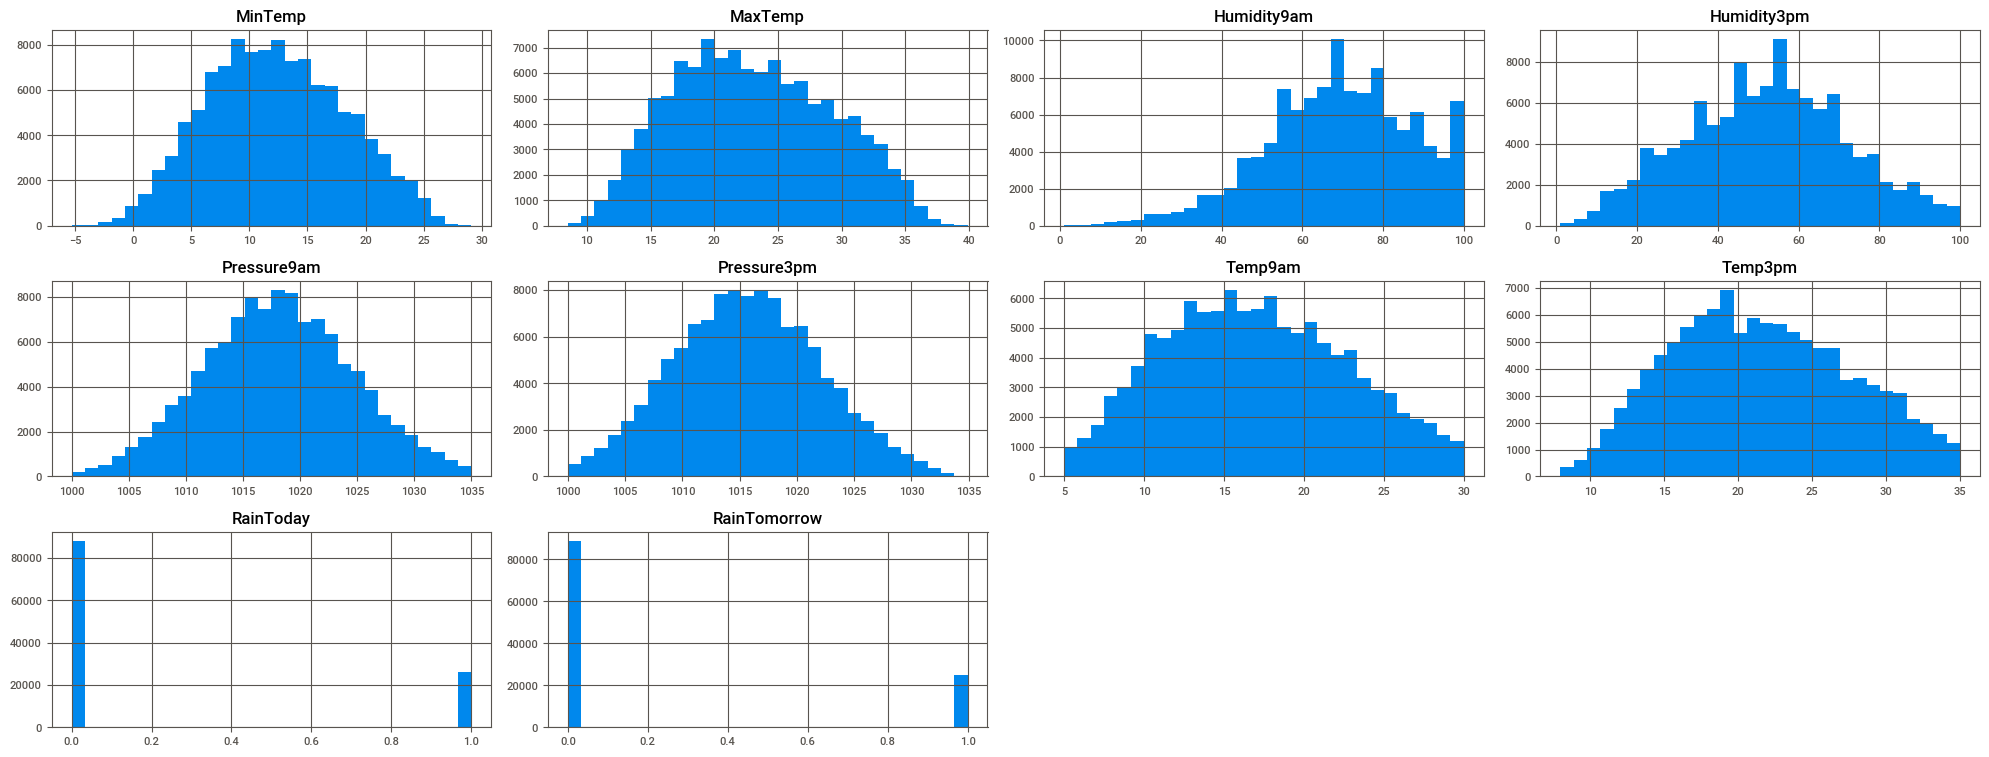

In [276]:
# Estatísticas descritivas do DataFrame
df.describe()

print("VARIÁVEIS NUMÉRICAS")
# Distribuição das variáveis numéricas
df.hist(bins=30, figsize=(20, 15), layout=(6, 4))
plt.tight_layout()
plt.show()

# print("VARIÁVEIS CATEGÓRICAS")
# # Contagem das variáveis categóricas do DataFrame
# plt.figure(figsize=(20, 15))
# for i, column in enumerate(df.select_dtypes(include='object').columns, 1):
#     plt.subplot(3, 3, i)
#     sns.countplot(data=df, y=column)
#     plt.title(f'{column} Count')
#     plt.xticks(rotation=45)

In [277]:
df.shape


(113907, 12)

In [278]:
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [279]:
locations_unicos = df['Location'].unique()
print(locations_unicos)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Richmond' 'Sydney' 'SydneyAirport' 'WaggaWagga'
 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong' 'Ballarat' 'Bendigo'
 'Sale' 'MelbourneAirport' 'Melbourne' 'Mildura' 'Nhil' 'Portland'
 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns' 'GoldCoast' 'Townsville'
 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera' 'Albany' 'Witchcliffe'
 'PearceRAAF' 'PerthAirport' 'Perth' 'Walpole' 'Hobart' 'Launceston'
 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']


In [280]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [281]:
target = df["RainTomorrow"]
target.shape

(113907,)

In [282]:
target = target.dropna()
target.unique()

array([0, 1], dtype=int64)

In [283]:
#features = df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
 #              'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
  #             'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
   #            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
    #           'Temp3pm', 'RainToday']]
features = df[['Location','Date','MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
features.shape

(113907, 11)

In [284]:
features.dtypes

Location        object
Date            object
MinTemp        float64
MaxTemp        float64
Humidity9am    float64
Humidity3pm    float64
Pressure9am    float64
Pressure3pm    float64
Temp9am        float64
Temp3pm        float64
RainToday        int64
dtype: object

In [285]:
# Crie uma cópia do DataFrame original para evitar o SettingWithCopyWarning
features_c = features.copy()

# Converta a coluna Date para datetime
features_c['Date'] = pd.to_datetime(features_c['Date'], errors='coerce')

# Verifique se houve algum NaT após a conversão
if features_c['Date'].isnull().any():
    print("Existem valores não convertidos em 'Date':")
    print(features_c[features_c['Date'].isnull()])  # Mostre as linhas com NaT

# Adicionando as novas colunas se a conversão for bem-sucedida
if not features_c['Date'].isnull().any():
    features_c['Year'] = features_c['Date'].dt.year
    features_c['Month'] = features_c['Date'].dt.month
    features_c['Day'] = features_c['Date'].dt.day
    features_c['DayOfWeek'] = features_c['Date'].dt.dayofweek

    # Remova a coluna Date se não for mais necessária
    features_c = features_c.drop(columns=['Date'])
else:
    print("Não foi possível adicionar as colunas porque existem valores NaT.")

In [286]:
features_c["RainToday"].describe()

count    113907.000000
mean          0.227466
std           0.419198
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday, dtype: float64

In [287]:
features_c['RainToday'] = features_c['RainToday'].map({'Yes': 1, 'No': 0})


In [288]:
from sklearn.preprocessing import OrdinalEncoder

# Codificando o campo Location em valores inteiros
encoder = OrdinalEncoder()
df['Location_encoded'] = encoder.fit_transform(df[['Location']])

# Agora remova a coluna original
df = df.drop(columns=['Location'])
# Ordenando os dados por data
df = df.sort_values('Date')

# Separando o DataFrame em treino, teste e validação
n = len(df)
train_end = int(0.6 * n)
test_end = int(0.8 * n)

x_train = df.iloc[:train_end].drop(columns=['RainTomorrow', 'Date'])
y_train = df.iloc[:train_end]['RainTomorrow']

x_test = df.iloc[train_end:test_end].drop(columns=['RainTomorrow', 'Date'])
y_test = df.iloc[train_end:test_end]['RainTomorrow']

x_val = df.iloc[test_end:].drop(columns=['RainTomorrow', 'Date'])
y_val = df.iloc[test_end:]['RainTomorrow']

# Treinando o modelo de regressão logística


In [289]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((68344, 10), (68344,), (22781, 10), (22781,), (22782, 10), (22782,))

In [290]:
x_train.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Location_encoded
45587,8.0,24.3,68.0,29.0,1019.7,1015.0,14.4,23.6,0,9.0
45588,14.0,26.9,80.0,36.0,1012.4,1008.4,17.5,25.7,1,9.0
45589,13.7,23.4,82.0,69.0,1009.5,1007.2,15.4,20.2,1,9.0
45590,13.3,15.5,62.0,56.0,1005.5,1007.0,13.5,14.1,1,9.0
45591,7.6,16.1,68.0,49.0,1018.3,1018.5,11.1,15.4,1,9.0


In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(max_iter=10000, tol=1e-5)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=10000, tol=1e-05)

In [303]:
y_pred = model.predict(scaler.transform(x_test))


In [304]:
accuracy_score(y_test, y_pred)

0.8429392915148589

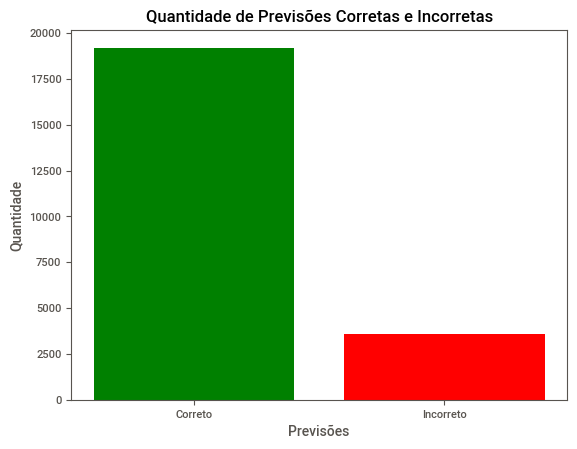

Acurácia: 84.2939291514859%


In [305]:
import matplotlib.pyplot as plt

# Contagem de corretos e incorretos
certo = 0
total = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        certo += 1
    total += 1

errado = total - certo

# Dados para o gráfico
labels = ['Correto', 'Incorreto']
values = [certo, errado]

# Criando o gráfico de barras
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Previsões')
plt.ylabel('Quantidade')
plt.title('Quantidade de Previsões Corretas e Incorretas')
plt.show()
print(f'Acurácia: {certo/total*100}%')

In [306]:
y_val_pred = model.predict(scaler.transform(x_val))


In [307]:
#Calculando a acurácia
accuracy_score(y_val, y_val_pred)

0.8392151698709508

In [ ]:
features_c = pd.get_dummies(features_c, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

KeyError: "['WindGustDir', 'WindDir9am', 'WindDir3pm'] not in index"

In [ ]:
features_c.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW       bool
WindDir3pm_SW        bool
WindDir3pm_W         bool
WindDir3pm_WNW       bool
WindDir3pm_WSW       bool
Length: 114, dtype: object

In [ ]:
target = target.map({'Yes': 1, 'No': 0})
target.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

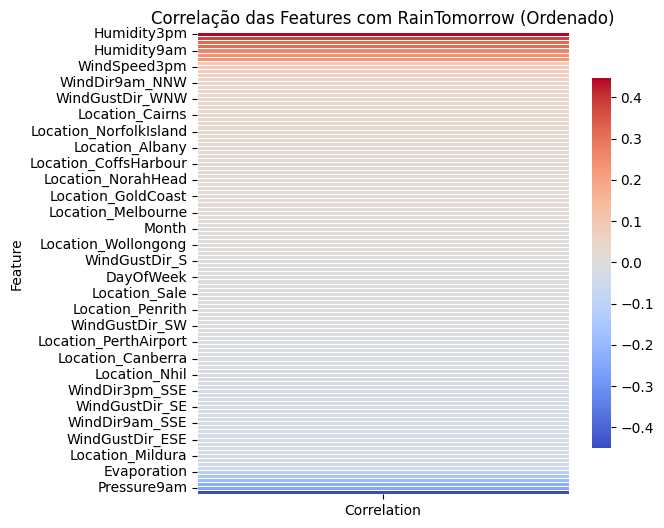

In [ ]:
# Adicionando a variável target ao DataFrame de features
features_c['RainTomorrow'] = target

# Calculando a correlação apenas com a variável target
correlation_with_target = features_c.corr()['RainTomorrow'].drop('RainTomorrow')

# Criando um DataFrame para o heatmap e ordenando pela correlação
correlation_df = correlation_with_target.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Ordenando pela correlação
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Criando o heatmap sem números
plt.figure(figsize=(6, 6))  # Define o tamanho da figura
sns.heatmap(correlation_df.set_index('Feature'), annot=False, cmap='coolwarm', 
            linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlação das Features com RainTomorrow (Ordenado)')
plt.show()